# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

<img src="figures/output.png">

## Problem Definition

$$h^{(i)} = \hat{y}^{(i)} = \text{sign}(\mathbf{w^{\top}}x^{(i)}+b)$$

The constraint is as follows:

$$
y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{w^{\top}} x^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{w^{\top}} x^{(i)}+b \ge 1 \\
                \end{array}
              \right.
$$

If we multiply $y$ on both equations, the constraint function can then be more concisely written as 

$$y^{(i)} (\mathbf{w^{\top}} x^{(i)}+b) \ge 1$$

The optimization problem can be summarized as:

$$
\begin{aligned}
	\min_{w, b} f(\mathbf{w},b) &= \min_{\mathbf{w}, b}  \  \frac{1}{2} ||\mathbf{w}||^2
	\\
	s.t. \ \  g_i(\mathbf{w},b) &= - (y^{(i)} (\mathbf{w}^{\top} x^{(i)} + b) - 1) \leq 0 
\end{aligned}
$$

## Lagrange Method

For SVM, we can write the equation as 

$$\mathcal{L}(\mathbf{w}, b, \alpha) =   \frac{1}{2} ||\mathbf{w}||^2 - \sum_i^m \alpha^{(i)} [y^{(i)} (\mathbf{w}^{\top} x^{(i)} + b) - 1]$$

We take the partial derivatives of $\mathcal{L}(\mathbf{w}, b, \alpha)$ with respect to $w$ and $b$, equate to zero and then plug the results back into the original equation of the Lagrangian

$$\min_{\mathbf{w},b} \mathcal{L}(\mathbf{w}, b, \alpha) =   \frac{1}{2} ||\mathbf{w}||^2 - \sum_i^m \alpha^{(i)} [y^{(i)} (\mathbf{w}^{\top} x^{(i)} + b) - 1]$$

$$\frac{\partial \mathcal{L}}{\partial {\mathbf w} }= {\mathbf w} - \sum \alpha^{(i)} \; y^{(i)} \; x^{(i)} = 0$$

$${\mathbf w} = \sum \alpha^{(i)} \; y^{(i)} \; x^{(i)}\tag{6}$$

$$\frac{\partial \mathcal{L}}{\partial b}=-\sum \alpha^{(i)} y^{(i)} = 0,$$

$$\sum \alpha^{(i)} \, y^{(i)} = 0\tag{7}$$

Plugging the ${\mathbf w} = \sum \alpha^{(i)} \; y^{(i)} \; x^{(i)}$ back to the original equation, as well as the fact that $\sum \alpha^{(i)} y^{(i)} = 0$, we got that 

$$
\begin{aligned}
	&\max_{\alpha} \min_{\mathbf{w},b} \mathcal{L}(\mathbf{w},b,\alpha)
	\\
	& \max_{\alpha} \sum_i^m \alpha^{(i)} - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha^{(i)} \alpha^{(j)} x^{(i)} x^{(j)} 
	\\
	& s.t. \ \alpha^{(i)} \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha^{(i)}y^{(i)} = 0	
\end{aligned}
$$
## Soft margin 

$$
\begin{aligned}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}^{2}+ C \sum_{i=1}^{m} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^{\top}}x^{(i)}+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,m\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,m\} 
\end{aligned}
$$

$$
\begin{aligned}
	&\max_{\alpha} \min_{\mathbf{w},b, \xi} \mathcal{L}(\mathbf{w}, b, \xi, \alpha, \alpha')
	\\
	& \max_{\alpha} \sum_i^m \alpha^{(i)} - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha^{(i)} \alpha^{(j)} x^{(i)} x^{(j)}
	\\
	& s.t. \ C \geq \alpha^{(i)} \geq 0  \tag{8}
	\\
	& s.t. \ \sum_i^m \alpha^{(i)} y^{(i)} = 0	
\end{aligned}
$$

#### Kernels

$$
\begin{aligned}
	&\max_{\alpha} \min_{\mathbf{w},b, \xi} \mathcal{L}(\mathbf{w}, b, \xi, \alpha, \alpha')
	\\
	& \max_{\alpha} \sum_i^m \alpha^{(i)} - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha^{(i)} \alpha^{(j)} \varphi(x^{(i)})\varphi(x^{(j)}) 
	\\
	& s.t. \ C \geq \alpha^{(i)} \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha^{(i)} y^{(i)} = 0	
\end{aligned}
$$

#### Making a prediction
Once the $\alpha^{(i)}$ are learned, one can predict the class of a new sample with the feature vector <code>X_test</code> as follows:

$$
\begin{aligned}
\hat{y}^{\text {test sample}}&=\text {sign}\left(\mathbf{w^{\top}}\phi\left(x^{\text {test sample}}\right)+b\right) \\
&= \text {sign}\left(\sum_{i =1}^{m}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)^{\top}\phi\left(x^{\text {test sample}}\right)+b \right)
\end{aligned}
$$

## Let's start with a simple dataset that is linearly separable

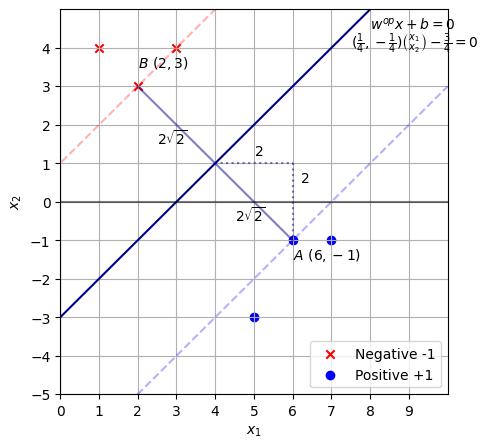

In [2]:
#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (5,5))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(text = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(text = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(text = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(text = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(text = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(text = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(text = '$w^{\top}x + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(text = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.grid()

## 1. Scratch: SVM with Hard Margin

Since we will solve this optimization problem using the **CVXOPT** library in python, we will need to match the solver's API which, according to the documentation is of the form:

$$
\begin{aligned}
    & \min \frac{1}{2} \mathbf{x}^{\top}\mathbf{P}\mathbf{x} + \mathbf{q}^{\top}\mathbf{x}
    \\
     s.t. \ & \ \mathbf{G}\mathbf{x} \leq \mathbf{h} 
    \\
    & \ \mathbf{A}\mathbf{x} = \mathbf{b}
\end{aligned}
$$

Recall that the dual problem is expressed as:

$$
\max_{\alpha} \sum_i^m \alpha^{(i)} - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha^{(i)} \alpha^{(j)} x^{(i)} x^{(j)}
$$

Let $\mathbf{H}$ be a matrix such that 

$$\mathbf{H}_{ij} = y^{(i)}y^{(j)} x^{(i)} x^{(j)} $$

Then the optimization becomes:

$$
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha^{(i)} - \frac{1}{2}  \alpha^{\top} \mathbf{H}  \alpha
    \\
     s.t. & \ \alpha^{(i)} \geq 0 
    \\
    &  \ \sum_i^m \alpha^{(i)} y^{(i)} = 0  
\end{aligned}
$$

We convert the sums into vector form and multiply both the objective and the constraint by −1
which turns this into a minimization problem and reverses the inequality

$$
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^{\top} \mathbf{H}  \alpha - 1^{\top} \alpha
    \\
    & s.t. \ - \alpha^{(i)} \leq 0 
    \\
    & s.t. \ y^{\top}\alpha = 0 
\end{aligned}
$$

We have that strange <code>1.T</code> just for the sake of matching with <code>CVXOPT</code> solver API.

We are now ready to convert our numpy arrays into the cvxopt format, using the same notations as in the documentation.  

- $\mathbf{P} = \mathbf{H}$ a matrix of size $(m, m)$
- $\mathbf{q} = \mathbf{-1}$ a matrix of size $(m, 1)$
- $\mathbf{G} = \mathbf{-diag[1]}$ a diagonal matrix of $-1s$ size $(m, m)$
- $\mathbf{h} = \mathbf{0}$ a vector of size $(m,1)$
- $\mathbf{A} = \mathbf{y}$ a vector of size $(m,1)$
- $\mathbf{b} = \mathbf{0}$ a vector


Note that in the simple example of $m=2$ the matrix $\mathbf{G}$ and vector $\mathbf{h}$ which define the constraint are

$$
\mathbf{G} = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
\mathbf{h} = \begin{bmatrix} 0 \\ 0  \end{bmatrix}
$$


In [3]:
X

array([[ 6, -1],
       [ 7, -1],
       [ 5, -3],
       [ 3,  4],
       [ 1,  4],
       [ 2,  3]])

In [4]:
y

array([ 1,  1,  1, -1, -1, -1])

In [5]:
#what we need to find - w, b, S

m, n = X.shape
m, n

(6, 2)

In [6]:
y = y.reshape(-1, 1) * 1.
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.]])

In [7]:
#compute H = yyxx
X_dash = y * X
H = np.dot(X_dash, X_dash.T) * 1.
H.shape

(6, 6)

In [8]:
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

In [9]:
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

In [10]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
sol

{'x': <6x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <6x1 matrix, tc='d'>,
 'z': <6x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.942629520421064e-11,
 'relative gap': 1.4308207243060007e-09,
 'primal objective': -0.06249999995463135,
 'dual objective': -0.06250000004405763,
 'primal infeasibility': 1.5515838457795457e-17,
 'dual infeasibility': 2.7701289870538194e-16,
 'primal slack': 2.6221768203213863e-12,
 'dual slack': 2.0977414634194414e-11,
 'iterations': 11}

In [11]:
alphas = np.array(sol['x'])

In [12]:
alphas

array([[6.25000000e-02],
       [5.24439796e-12],
       [5.24422116e-12],
       [6.43702943e-06],
       [2.62217682e-12],
       [6.24935630e-02]])

In [13]:
S = (alphas > 1e-4).flatten()

In [14]:
S

array([ True, False, False, False, False,  True])

In [15]:
X

array([[ 6, -1],
       [ 7, -1],
       [ 5, -3],
       [ 3,  4],
       [ 1,  4],
       [ 2,  3]])

In [16]:
y.shape

(6, 1)

In [17]:
alphas.shape

(6, 1)

In [18]:
y * alphas

array([[ 6.25000000e-02],
       [ 5.24439796e-12],
       [ 5.24422116e-12],
       [-6.43702943e-06],
       [-2.62217682e-12],
       [-6.24935630e-02]])

In [19]:
X.shape

(6, 2)

In [20]:
w = ((y[S] * alphas[S]).T @ X[S]).reshape(-1, 1)

In [21]:
w

array([[ 0.25001287],
       [-0.24998069]])

In [22]:
# y = w @ x + b
b = y[S] - np.dot(X[S], w)

In [23]:
b

array([[-0.75005793],
       [-0.75008368]])

In [24]:
sample  = np.array([  [1, 3]   ]) #neg
sample2 = np.array([  [7, -3]])   #pos

In [25]:
yhat = np.sign(sample @ w + b)

In [26]:
yhat

array([[-1.],
       [-1.]])

In [27]:
yhat = np.sign(sample2 @ w + b)

In [28]:
yhat

array([[1.],
       [1.]])

## 2. Scratch: SVM with Soft Margin

To make the data no longer linearly separable, we shall add a positive point in the middle of the negative cluster:

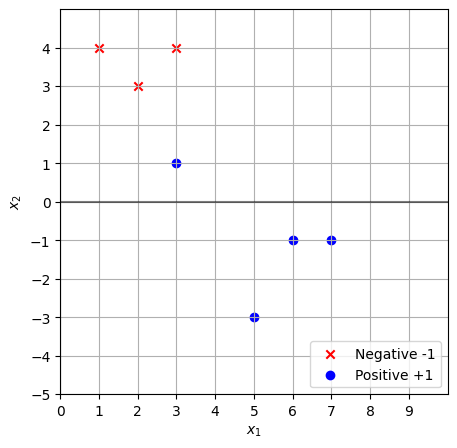

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3],[3,1]])
y_pos = np.array([1,1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

fig = plt.figure(figsize = (5,5))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
# plt.plot(x1, x1  - 3, color = 'darkblue', alpha = .6)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'lower right')
plt.grid()

#New dataset (for later)
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3],[3,1]] )
y = np.array([-1,-1, -1, 1, 1 , 1, 1])

For the soft margin SVM, the optimization problem can be slightly revised and be expressed as 

$$
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha^{(i)}  - \frac{1}{2}  \alpha^{\top} \mathbf{H}  \alpha
    \\
     s.t. \ \ & 0 \leq \alpha^{(i)} \leq C 
    \\
    &  \ \sum_i^m \alpha^{(i)} y^{(i)} = 0  
\end{aligned}
$$

which can be written in standard form as

$$
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^{\top} \mathbf{H}  \alpha - 1^{\top} \alpha
    \\
     s.t. & \ - \alpha^{(i)} \leq 0 
    \\
     & \alpha^{(i)} \leq C
     \\
     &\ y^{\top} \alpha = 0  
\end{aligned}
$$

We translate this new constraint into standard form by concatenating below matrix $\mathbf{G}$ a diagonal matrix of 1s of size $(m, m)$. Similarly for the vector $\mathbf{h}$ to which the value of $\mathbf{C}$ is added $m$ times.

Note that in the simple example of $m=2$ the matrix $\mathbf{G}$ and vector $\mathbf{h}$ which define the constraint are:

$$
\mathbf{G} = \begin{bmatrix} -1 & 0 \\ 0 & -1 \\ 1 & 0 \\ 0 & 1\end{bmatrix}
$$

$$
\mathbf{h} = \begin{bmatrix} 0 \\ 0 \\ C \\ C \end{bmatrix}
$$



In [30]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('X: ', X)
print('Alphas: ', alphas)
alphas_ix = alphas.reshape(-1, )
print('X with alpha > 0: ', X[alphas_ix > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

X:  [[ 3  4]
 [ 1  4]
 [ 2  3]
 [ 6 -1]
 [ 7 -1]
 [ 5 -3]
 [ 3  1]]
Alphas:  [[3.31724130e-11]
 [1.67086585e-12]
 [4.00000000e-01]
 [2.92952486e-13]
 [2.51838723e-13]
 [5.22845095e-13]
 [4.00000000e-01]]
X with alpha > 0:  [[2 3]
 [3 1]]
w =  [ 0.4 -0.8]
b =  [0.6]


## 3. Scratch: Implementing Kernels

Accuracy: 1.0


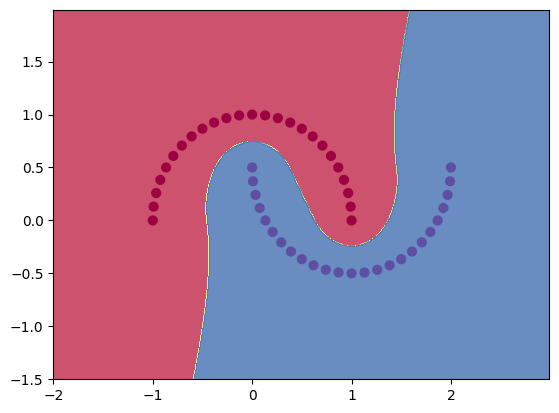

In [31]:
import cvxopt
from sklearn import datasets

#here I use z instead of xprime since I don't know how to write prime in code....
def linear(x, z):
    return np.dot(x, z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p

def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


class SVM:
    def __init__(self, kernel=gaussian, C=1):
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        self.y = y
        self.X = X
        m, n = X.shape

        # Calculate Kernel
        self.K = np.zeros((m, m))
        for i in range(m):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])

    def predict(self, X):  #<----this is X_test
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )

        return np.sign(y_predict + self.b)

    def get_parameters(self, alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        return sv
    
if __name__ == "__main__":
    X, y = datasets.make_moons(50)
    
    #transform our y to be -1 and 1 to meet svm purpose
    y[y==0] = -1
    
    svm = SVM(kernel=gaussian)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    plot_contour(X, y, svm)

    print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")